# 05 team context Notebook

This notebook implements the analysis for the 05 team context stage of the Fantasy Football Analysis project.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the src directory to path
sys.path.append('..')

# Set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
# TODO: Implement 05 team context analysis

In [3]:
# Import project modules
from src.data.data_loader import load_config, load_all_data
from src.data.data_loader import load_csv_data
from src.analysis.team_context import (
    analyze_team_performance_correlation,
    analyze_opportunity_share,
    analyze_offensive_line_impact
)
from src.visualization.team_context_vis import (
    plot_team_correlations,
    plot_opportunity_quadrants,
    plot_offensive_line_impact
)
from src.utils.validation import validate_analysis_output

# Set pandas display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [4]:
# 1. Load configuration and processed data
config = load_config()
player_df = load_csv_data(os.path.join(config['data_paths']['processed_data'], 'vorp_analysis.csv'))

# Load team data
data_dict = load_all_data(config)
team_df = data_dict['team_stats']
line_df = data_dict['line_data']

2025-03-28 21:13:13,782 - INFO - Configuration loaded from config/config.yaml
2025-03-28 21:13:13,783 - INFO - Loading data from data/processed/vorp_analysis.csv
2025-03-28 21:13:13,797 - INFO - Loaded dataframe with shape: (629, 274)
2025-03-28 21:13:13,799 - WARNING - Missing values detected in data/processed/vorp_analysis.csv:
2025-03-28 21:13:13,799 - WARNING -   - Rushing Y/A: 307 missing values
2025-03-28 21:13:13,799 - WARNING -   - Receiving Y/R: 172 missing values
2025-03-28 21:13:13,800 - WARNING -   - 2PM: 585 missing values
2025-03-28 21:13:13,800 - WARNING -   - 2PP: 607 missing values
2025-03-28 21:13:13,800 - WARNING -   - Season_preseason: 453 missing values
2025-03-28 21:13:13,800 - WARNING -   - Tiers: 453 missing values
2025-03-28 21:13:13,801 - WARNING -   - Position: 453 missing values
2025-03-28 21:13:13,801 - WARNING -   - Team_preseason: 453 missing values
2025-03-28 21:13:13,801 - WARNING -   - Team (Alt)_preseason: 453 missing values
2025-03-28 21:13:13,802 - 

In [5]:
# 2. Analyze team performance correlation
team_results = analyze_team_performance_correlation(player_df, team_df)

# Display correlation results
if 'position_team_correlations' in team_results:
    print("Team-Player Performance Correlations:")
    display(team_results['position_team_correlations'].sort_values('Correlation', ascending=False))

if 'team_tier_performance' in team_results:
    print("\nPlayer Performance by Team Tiers:")
    display(team_results['team_tier_performance'])

2025-03-28 21:13:14,018 - INFO - Analyzing team performance correlations
2025-03-28 21:13:14,021 - INFO - Input player_df shape: (629, 274)
2025-03-28 21:13:14,021 - INFO - Input team_df shape: (64, 31)
2025-03-28 21:13:14,021 - INFO - Player DataFrame columns: ['Season', 'Rk', 'Player', 'Team', 'Team (Alt)', 'Team (Full)', 'FantPos', 'Age', 'G', 'GS', 'Passing Cmp', 'Passing Att', 'Passing Yds', 'Passing TD', 'Passing Int', 'Rushing Att', 'Rushing Yds', 'Rushing Y/A', 'Rushing TD', 'Receiving Tgt', 'Receiving Rec', 'Receiving Yds', 'Receiving Y/R', 'Receiving TD', 'Fmb', 'FL', 'TD', '2PM', '2PP', 'Total', ' Passing ', ' Rushing ', ' Receiving ', ' Total PPG ', ' Passing PPG ', ' Rushing PPG ', ' Receiving PPG ', ' Total Share ', ' Passing Share ', ' Rushing Share ', ' Receiving Share ', 'Team_std', 'Season_preseason', 'Tiers', 'Position', 'Team_preseason', 'Team (Alt)_preseason', 'Team (Full)_preseason', 'ADP', 'ADP Pos Rank', 'FP ECR', 'PFF', 'Draft Sharks', '4 FOR 4', 'Ringer', 'Sha

Team-Player Performance Correlations:


KeyError: 'Correlation'

In [6]:
# 3. Analyze opportunity share
opportunity_df = analyze_opportunity_share(player_df, team_df)

# Display opportunity share analysis
print("\nOpportunity Share Analysis:")
share_cols = [col for col in opportunity_df.columns if 'Share' in col] + ['Points_Per_Opportunity', 'Efficiency_Quadrant']
display(opportunity_df[['Player', 'FantPos', 'Team_std', 'Half_PPR'] + share_cols].head(20))

# Group by efficiency quadrant
if 'Efficiency_Quadrant' in opportunity_df.columns:
    print("\nPerformance by Efficiency Quadrant:")
    quad_stats = opportunity_df.groupby(['FantPos', 'Efficiency_Quadrant']).agg({
        'Half_PPR': ['mean', 'count'],
        'Points_Per_Opportunity': 'mean'
    }).reset_index()
    quad_stats.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in quad_stats.columns]
    display(quad_stats)
    
    # Show top players in each quadrant
    print("\nTop High Volume, High Efficiency Players:")
    high_vol_high_eff = opportunity_df[opportunity_df['Efficiency_Quadrant'] == 'High Vol, High Eff']
    display(high_vol_high_eff.sort_values('Half_PPR', ascending=False)[
        ['Player', 'FantPos', 'Team_std', 'Half_PPR', 'Points_Per_Opportunity']
    ].head(10))
    
    print("\nTop Low Volume, High Efficiency Players (Potential Breakouts):")
    low_vol_high_eff = opportunity_df[opportunity_df['Efficiency_Quadrant'] == 'Low Vol, High Eff']
    display(low_vol_high_eff.sort_values('Points_Per_Opportunity', ascending=False)[
        ['Player', 'FantPos', 'Team_std', 'Half_PPR', 'Points_Per_Opportunity']
    ].head(10))


2025-03-28 21:13:21,009 - INFO - Analyzing opportunity share
2025-03-28 21:13:21,010 - ERROR - Missing required columns - Player: [], Team: ['Team_std']



Opportunity Share Analysis:


KeyError: "None of [Index(['Player', 'FantPos', 'Team_std', 'Half_PPR', 'Points_Per_Opportunity', 'Efficiency_Quadrant'], dtype='object')] are in the [columns]"

In [ ]:
# 4. Analyze offensive line impact
line_results = analyze_offensive_line_impact(player_df, line_df)

# Display offensive line impact results
for key, df in line_results.items():
    print(f"\n{key.replace('_', ' ').title()}:")
    display(df)


<Figure size 1200x800 with 0 Axes>

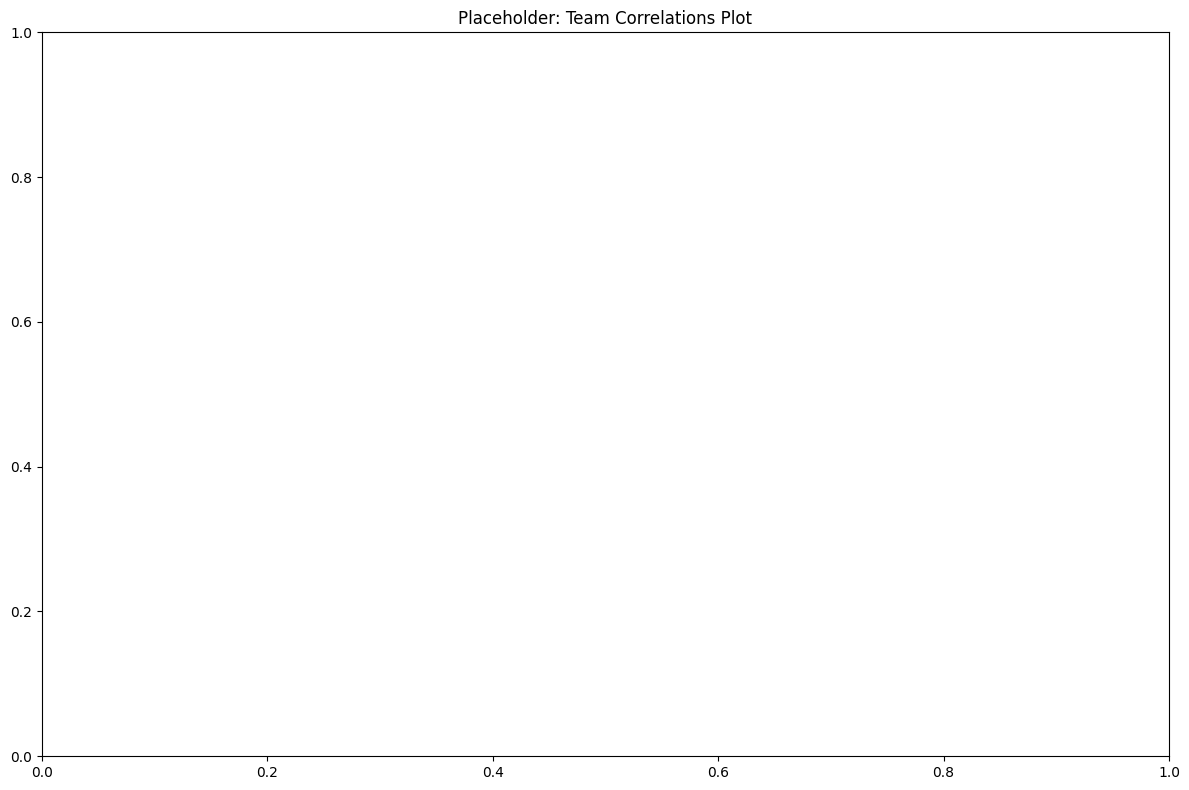

KeyError: 'FantPos'

<Figure size 1400x1200 with 0 Axes>

In [7]:
# 5. Create visualizations
# Team correlations
if 'position_team_correlations' in team_results:
    plt.figure(figsize=(12, 8))
    plot_team_correlations(team_results['position_team_correlations'])
    plt.tight_layout()
    plt.savefig('../outputs/figures/team_correlations.png')
    plt.show()

# Opportunity quadrants
plt.figure(figsize=(14, 12))
plot_opportunity_quadrants(opportunity_df)
plt.tight_layout()
plt.savefig('../outputs/figures/opportunity_quadrants.png')
plt.show()

# Offensive line impact
if len(line_results) > 0:
    plt.figure(figsize=(12, 8))
    plot_offensive_line_impact(line_results)
    plt.tight_layout()
    plt.savefig('../outputs/figures/offensive_line_impact.png')
    plt.show()

In [8]:
# 6. Save processed data
for key, df in team_results.items():
    df.to_csv(os.path.join(config['data_paths']['processed_data'], f"{key}.csv"), index=False)

opportunity_df.to_csv(os.path.join(config['data_paths']['processed_data'], 'opportunity_share.csv'), index=False)

for key, df in line_results.items():
    df.to_csv(os.path.join(config['data_paths']['processed_data'], f"{key}.csv"), index=False)

print("Team context analysis completed!")

NameError: name 'line_results' is not defined